<a href="https://colab.research.google.com/github/GiliWolf/ml_course/blob/master/HR_endtoend_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HR Project

The aim of this file is to analyze the IBM HR Analytics Employee Attrition & Performance data set.

The proccess is done accordinly to Anthony NG's data set analysis in his Udemy's ml course.

Few adjustments and improvents are done.

**Importing packages**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Downloading HR project data**:
IBM HR Analytics Employee Attrition & Performance

In [4]:
df = pd.read_csv('HR_data_set.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# pre processing


**EDA:**

1. **look at the shape and info of the data**

  *columns (features):* 35
    
      * mostly numerical, few discrete.

 *rows of data:* 1470

In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

2. **clean null data**

  in this case the data is already clean.

In [7]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

3. **Use describe function in order to explore the data**

    * find un-useful featurs and get read of them

In [8]:
#change setting inorder to visulize all of the features
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


getting rid of 3 columns: 'EmployeeCount', 'EmployeeNumber' & 'StandardHours'.

In [9]:
col_to_remove = ['EmployeeCount', 'EmployeeNumber' , 'StandardHours']
df = df.drop(columns = col_to_remove)

In [10]:
# validation
print(df.shape)
df.head()

(1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


4. **explore pd.DataFrame.corr() in order to find collinearity**
    * seperate numerical and catagorial features
    * hit map the corrolation table


In [11]:
num_col = list(df.describe().columns)
num_col


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
cat_col  = list(set(df.columns).difference(num_col))
cat_col

['JobRole',
 'Department',
 'MaritalStatus',
 'BusinessTravel',
 'OverTime',
 'Over18',
 'EducationField',
 'Attrition',
 'Gender']

In [13]:
corr_table = df[num_col].corr()

<ipython-input-14-37ccd98861ba>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[num_col].corr(), dtype=np.bool)


<Axes: >

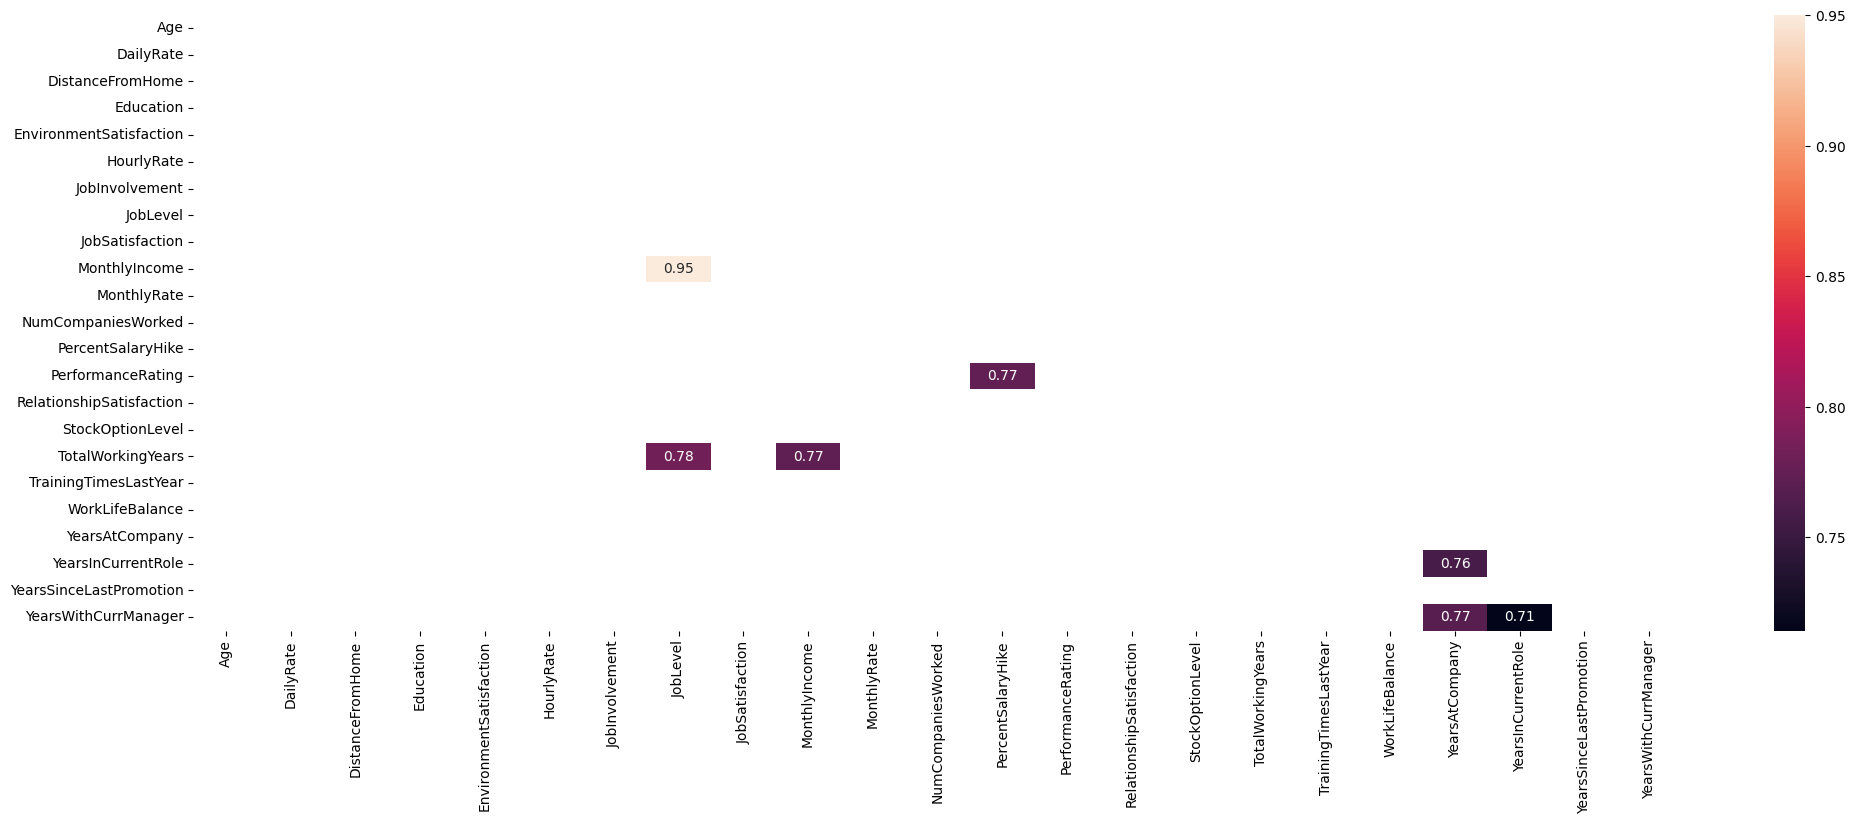

In [14]:
# visualize only the buttomn tringle with corr above 0.7

plt.figure(figsize=(24,8))
mask = np.zeros_like(df[num_col].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fil_df = df[num_col].corr()[np.abs(df[num_col].corr()) > 0.7]
sns.heatmap(fil_df, mask=mask, annot=True, fmt=".2f")


Found out a high colinearity between 'JobLevel' and 'MonthlyIncome'

Decieded to drop the 'JobLevel' feature

In [15]:
df = df.drop(columns = ['JobLevel'])

In [16]:
#validation
df.shape

(1470, 31)

5. **one hot encoding for the catagorial features**

In [17]:
# iterationg over each catogrial column and check unique values count
for c in cat_col:
  print(df[c].value_counts(),'\n')

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

No     1054
Yes     416
Name: OverTime, dtype: int64 

Y    1470
Name: Over18, dtype: int64 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

No     1233
Yes     237
Name: Attrition, dtype: int64 

Male      882
Female

conclusions:
  * over 18 should be dropped as all of the workers are above 18
  * 'Attrition', 'OverTime' & and 'Gender' all has 2 classes, so will be mapped into 1,0
  * other columns will be one-hot encoded

In [18]:
# drop 'Over18'
df = df.drop(columns = ['Over18'])
df.shape


(1470, 30)

In [19]:
# mapping 'Attrition', 'OverTime' & and 'Gender'
map_col = {'Attrition': {'No': 1, 'Yes':0},
           'OverTime': {'No': 1, 'Yes':0},
           'Gender': {'Female': 1, 'Male': 0}}

for c, m in map_col.items():
  df[c] = df[c].map(m)

In [20]:
# one-hot encoding

#removing dealt with columns from list

col_to_remove = ['Attrition', 'OverTime','Gender', 'Over18']
cat_col  = list(set(cat_col).difference(col_to_remove))


In [21]:
df_cat = pd.get_dummies(df[cat_col])
df_cat.head()

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [22]:
df = df.drop(columns= cat_col)

In [23]:
# integrate numerical and one-hot-encoded catagorial
X = pd.concat([df, df_cat], axis = 1)
X.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,0,1102,1,2,2,1,94,3,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,49,1,279,8,1,3,0,61,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,37,0,1373,2,2,4,0,92,2,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,33,1,1392,3,4,4,1,56,3,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,27,1,591,2,1,1,0,40,3,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [24]:
# use attrition as the target
y = X['Attrition']
X = X.drop(columns = ['Attrition'])

In [25]:
# check all of the columns are int type, and not object (string)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   Gender                             1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  OverTime            

6. split the data + standartization

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

In [27]:
# standarization:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Desicion tree

7. creat a model
    
    * desicion tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
# try playing with hyper parameters to get better results (**in real life you do it only **before** you try out the test data)
clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10)
clf.fit(X_train_std, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [29]:
# check accuracy scores for train
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
y_predict = clf.predict(X_train_std)
print('accuracy:  ', accuracy_score(y_train, y_predict), '\n')
print('comfusion matrix:\n', confusion_matrix(y_train,y_predict),'\n')
print('classification report:\n', classification_report(y_train,y_predict),'\n')
print('ROC: ', roc_auc_score(y_train, y_predict))

accuracy:   0.8872691933916423 

comfusion matrix:
 [[ 65  97]
 [ 19 848]] 

classification report:
               precision    recall  f1-score   support

           0       0.77      0.40      0.53       162
           1       0.90      0.98      0.94       867

    accuracy                           0.89      1029
   macro avg       0.84      0.69      0.73      1029
weighted avg       0.88      0.89      0.87      1029
 

ROC:  0.6896599598445042


In [30]:
# check accuracy scores for train
y_test_predict = clf.predict(X_test_std)
print('accuracy:  ', accuracy_score(y_test, y_test_predict), '\n')
print('comfusion matrix:\n', confusion_matrix(y_test, y_test_predict),'\n')
print('classification report:\n', classification_report(y_test, y_test_predict),'\n')
print('ROC: ', roc_auc_score(y_test, y_test_predict))

accuracy:   0.8390022675736961 

comfusion matrix:
 [[ 21  54]
 [ 17 349]] 

classification report:
               precision    recall  f1-score   support

           0       0.55      0.28      0.37        75
           1       0.87      0.95      0.91       366

    accuracy                           0.84       441
   macro avg       0.71      0.62      0.64       441
weighted avg       0.81      0.84      0.82       441
 

ROC:  0.616775956284153


# Ensamble

In [37]:
# show results and summerise it
ens_sum = pd.DataFrame(columns= ['model', 'accuracy','ROC_auc'])


In [40]:
def show_results(y_true, y_predict, label = 'results'):
  print(label, ':\n\n')
  acc_score = accuracy_score(y_true, y_predict)
  print('accuracy:  ', acc_score, '\n')
  print('comfusion matrix:\n', confusion_matrix(y_true, y_predict),'\n')
  print('classification report:\n', classification_report(y_true, y_predict),'\n')
  roc =  roc_auc_score(y_true, y_predict)
  print('ROC: ', roc)
  ens_sum.loc[len(ens_sum)] = [label, acc_score, roc]

In [44]:
# 1:  bagging (desicion tree as base estimatior)

from sklearn.ensemble import BaggingClassifier
bag_cls = BaggingClassifier(clf)
bag_cls.fit(X_train_std, y_train)
y_test_predict = bag_cls.predict(X_test_std)
show_results(y_test, y_test_predict, 'Bagging Classifier')

Bagging Classifier :


accuracy:   0.8616780045351474 

comfusion matrix:
 [[ 19  56]
 [  5 361]] 

classification report:
               precision    recall  f1-score   support

           0       0.79      0.25      0.38        75
           1       0.87      0.99      0.92       366

    accuracy                           0.86       441
   macro avg       0.83      0.62      0.65       441
weighted avg       0.85      0.86      0.83       441
 

ROC:  0.6198360655737705


In [42]:
ens_sum

,model,accuracy,ROC_auc
0,Bagging Classifier,0.845805,0.599672


In [45]:
# 2:  random forest
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train_std, y_train)
y_test_predict = rf_cls.predict(X_test_std)
show_results(y_test, y_test_predict, 'Random Forest Classifier')

Random Forest Classifier :


accuracy:   0.8435374149659864 

comfusion matrix:
 [[  9  66]
 [  3 363]] 

classification report:
               precision    recall  f1-score   support

           0       0.75      0.12      0.21        75
           1       0.85      0.99      0.91       366

    accuracy                           0.84       441
   macro avg       0.80      0.56      0.56       441
weighted avg       0.83      0.84      0.79       441
 

ROC:  0.5559016393442623


In [46]:
# 3:  Ada-Boost
from sklearn.ensemble import AdaBoostClassifier
ab_cls = AdaBoostClassifier()
ab_cls.fit(X_train_std, y_train)
y_test_predict = ab_cls.predict(X_test_std)
show_results(y_test, y_test_predict, 'Ada Boost Classifier')

Ada Boost Classifier :


accuracy:   0.891156462585034 

comfusion matrix:
 [[ 34  41]
 [  7 359]] 

classification report:
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        75
           1       0.90      0.98      0.94       366

    accuracy                           0.89       441
   macro avg       0.86      0.72      0.76       441
weighted avg       0.89      0.89      0.88       441
 

ROC:  0.7171038251366121


In [47]:
# 4:  Gradiant Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_cls = GradientBoostingClassifier()
gb_cls.fit(X_train_std, y_train)
y_test_predict = gb_cls.predict(X_test_std)
show_results(y_test, y_test_predict, 'Gradient Boosting Classifier')

Gradient Boosting Classifier :


accuracy:   0.8752834467120182 

comfusion matrix:
 [[ 24  51]
 [  4 362]] 

classification report:
               precision    recall  f1-score   support

           0       0.86      0.32      0.47        75
           1       0.88      0.99      0.93       366

    accuracy                           0.88       441
   macro avg       0.87      0.65      0.70       441
weighted avg       0.87      0.88      0.85       441
 

ROC:  0.654535519125683


In [48]:
# 5: XG
import xgboost as xgb
XGB_cls = xgb.XGBClassifier()
XGB_cls.fit(X_train_std, y_train)
y_test_predict = XGB_cls.predict(X_test_std)
show_results(y_test, y_test_predict, 'XGB Classifier')

XGB Classifier :


accuracy:   0.8707482993197279 

comfusion matrix:
 [[ 26  49]
 [  8 358]] 

classification report:
               precision    recall  f1-score   support

           0       0.76      0.35      0.48        75
           1       0.88      0.98      0.93       366

    accuracy                           0.87       441
   macro avg       0.82      0.66      0.70       441
weighted avg       0.86      0.87      0.85       441
 

ROC:  0.6624043715846994


# summary of enembles preformences

In [49]:
ens_sum

,model,accuracy,ROC_auc
0,Bagging Classifier,0.845805,0.599672
1,Bagging Classifier,0.848073,0.574536
2,Bagging Classifier,0.861678,0.619836
3,Random Forest Classifier,0.843537,0.555902
4,Ada Boost Classifier,0.891156,0.717104
5,Gradient Boosting Classifier,0.875283,0.654536
6,XGB Classifier,0.870748,0.662404


**best performance:    AdaBoost**